In [32]:
#import packages
import pandas as pd
import numpy as np
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#import excel file containing data summary
wtpdata = pd.read_excel (r'wtp_taskdata_summary.xlsx')


In [34]:
print(wtpdata)

                  participant  avg_spent_social  avg_spent_nonsocial  \
0    5ea3310bf9c4f828f0c909c5          0.030244             0.029000   
1    5eeaff28cf5da71d691ef212          0.026000             0.028780   
2    5ee1bc2e2be5f61f0eaf1713          0.027308             0.028000   
3   ﻿5cfecc1e96681500168a1799          0.038333             0.037037   
4    5ff362e8c9707d8ff6020080          0.028800             0.026800   
5   ﻿5e76742575ad9c0506e721bb          0.031667             0.029091   
6    ﻿5ef76ff7d195c248bfe2511          0.031795             0.030833   
7   ﻿5f7e4fbc36d39211c80599fe          0.035263             0.027813   
8   ﻿5f8dd51f6d2378145bf99cdc          0.326316             0.029063   
9   ﻿5f12b3a2791d172281e7d6a9          0.028621             0.024545   
10  ﻿5f974745d58f7f0fca155a48          0.029615             0.027200   
11  ﻿5ff0a56b116bbf440e520992          0.037692             0.029600   
12  ﻿566c9284d408ea000519c6d7          0.018889             0.01

In [35]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = np.mean(socialavg)
print(social_M)

0.04849848833227512


In [36]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences

nonsocial_M = np.mean(nonsocialavg)
print(nonsocial_M)


0.029843302241504492


In [37]:
#sample size
n = len(wtpdata)
print(n)

18


In [38]:
#Calculate std
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
std = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(std)

0.0885770173529377 0.3357933496338712
0.06958394419585202


In [39]:
#calculate standard error of the difference between the means
sed = std / np.sqrt(n)
print(sed)

0.01640109293419776


In [40]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

1.1374355456442102


In [41]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

17


In [42]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.137, df=17, cv=1.740, p=0.271
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


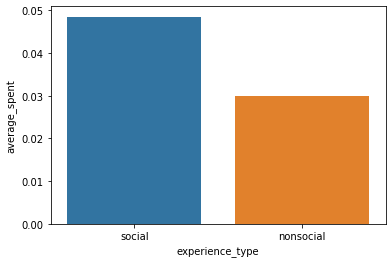

In [138]:
#wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})
#print(wtp_means)
ax = sns.barplot(data=wtpdata, x=wtp_means.experience_type, y=wtp_means.average_spent, ci=68)